# Example on how to intersect a polytope with a specific direction
Using helpers function from the file *PolytopeDiscretization.py*

## 1. Retrieve a polytope
- Load a polytope (don't load everything!!!!)

In [12]:
import pickle
import numpy as np

folder = "./POLYTOPES/M_2"
with open(f"{folder}/polytope_115.0_75.0_115.0_90.0_-15.0.pkl", "rb") as f:
    result = pickle.load(f)

jointConfiguration = np.array(list(result["configuration"].values()))

array([115.,  75., 115.,  90., -15.])

In [7]:
result.keys()

dict_keys(['J', 'N', 't_min', 't_max', 'tol', 'vertices', 'face_indices', 'H', 'd', 'name', 'configuration'])

In [11]:
np.array(list(result["configuration"].values()))

[115.0, 75.0, 115.0, 90.0, -15.0]

In [2]:
import pycapacity.human as capacity

vertices = result["vertices"]
face_indices = result["face_indices"]
faces = capacity.face_index_to_vertex(vertices, face_indices)

## 2. Classic polytope

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
from pycapacity.visual import plot_polytope_faces, plot_polytope_vertex # pycapacity visualisation tools

fig = plt.figure()

# draw faces and vertices
ax = plot_polytope_vertex(plt=plt, vertex=vertices, label='force',color='blue')
plot_polytope_faces(ax=ax, faces=faces, face_color='blue', edge_color='blue', alpha=0.2)

ax.set_xlabel("x (N)")
ax.set_ylabel("y (N)")
ax.set_zlabel("z (N)")

plt.tight_layout()
plt.legend()
plt.show()

## 3. Discretized polytope
1. First you choose how many directions you want per axis (let's say you choose 4: then for the $x$-axis you take $[-1,1]$ that you cut into 4 parts, then you do all combinations with the $y$ and $z$-axes which will be also cut into 4 parts).
2. Retrieve the directions automatically.
3. Take your polytope from the data and intersect it with the directions from 2. Retrieve the points of intersection (in the same order of the directions).
4. (optional) Display everything.

In [4]:
from PolytopeDiscretization import generateUniformDirectionsOnCube, intersectPolytopeWithDirections

nbSteps = 4 # 1.
directions = generateUniformDirectionsOnCube(nbSteps) # 2.
polytopeDiscretized = intersectPolytopeWithDirections(vertices, directions) # 3.

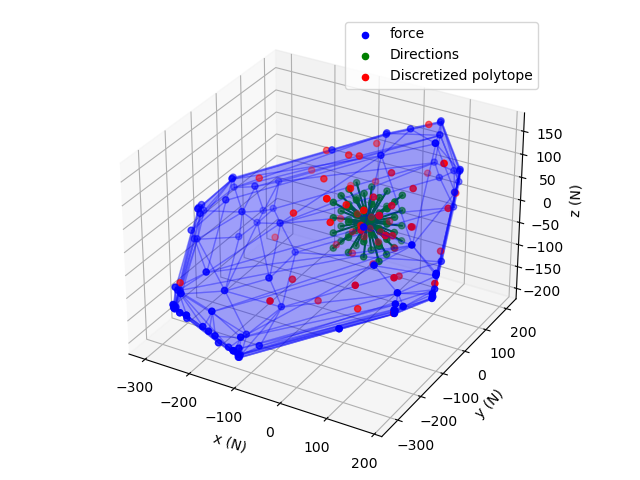

In [5]:
%matplotlib widget
from PolytopeDiscretization import drawDirections, drawDiscretizedPolytope

fig = plt.figure("Displaying how the discretized polytope looks like.")

# NORMAL POLYTOPE (FROM DATA)
ax = plot_polytope_vertex(plt=plt, vertex=vertices, label='force',color='blue')
plot_polytope_faces(ax=ax, faces=faces, face_color='blue', edge_color='blue', alpha=0.2)

# DISCRETIZED VERSION
drawDirections(ax=ax, directions=directions, color="green", scaleFactor=50, label="Directions")
drawDiscretizedPolytope(ax=ax, polytopeDiscretized=polytopeDiscretized, color="red", label="Discretized polytope")

ax.set_xlabel("x (N)")
ax.set_ylabel("y (N)")
ax.set_zlabel("z (N)")

plt.tight_layout()
plt.legend()
plt.show()